Como ya hemos visto, cuando tenemos muchos datos, podemos realizar el entrenamiento completo de la CNN, sin embargo, cuando tenemos pocos datos es muy aconsejable aplicar transferencia de conocimiento. Generalmente, esta se aplica en dos pasos:

1. Extracción de características: se congelan todas las capas encargadas de la extracción de características y únicamente se entrena una última capa de clasificación (Dense) la cual sustituye la que tuviera la CNN original y se adapta al nuevo problema.

2. Ajuste fino: se descongelan las capas convolucionales encargadas de la extracción de características y se entrena toda la CNN durante unas pocas épocas para adaptar las características al nuevo problema.

Vamos a emplear la misma base de datos que en el tema anterior: clasificación de imágenes de perros y gatos.

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from pathlib import Path

import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.ticker import MultipleLocator
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory

from pathlib import Path

import numpy as np
import os

import matplotlib.pyplot as plt

# 1. Preparamos la base de datos

In [9]:
# Descargamos la base de datos
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

# Directorio base de datos descargada
path_images = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# Directorios con las imágenes de entrenamiento y validación
path_train = os.path.join(path_images, 'train')
path_validation = os.path.join(path_images, 'validation')

In [10]:
# Vamos a emplear el método image_dataset_from_directory de tensorflow para crear los datasets

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(path_train,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(path_validation,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [11]:
class_names = train_dataset.class_names
print(class_names)

['cats', 'dogs']


Clase 0 --> Gato
Clase 1 --> Perro

In [12]:
# Evitamos bloqueo E/S
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

# Ejercicio 1

Para, posteriormente, ver la comparativa de los resultados obtenidos al entrenar nosotros un modelo sencillo frente aplicar transferencia de conocimiento, vamos a implementar dicho modelo sencillo. Para ello sigue los siguientes pasos:

1. Aplica normalización (escalado entre 0-1) a la base de datos. **No sobreescribas** las variables "train_dataset", "validation_dataset" y "test_dataset" ya que las necesitaremos después, crea unas nuevas (e.g., train_dataset_norm, validation_dataset_norm, test_dataset_norm).

2. Implementa la arquitectura que se corresponda al summary de la figura siguiente donde la capa de salida hace uso de una función de activación sigmoide. Tras cada capa convolucional emplea una capa de normalización de lote "BatchNormalization", de la forma: **x = layers.BatchNormalization()(x)** (esto le va a dar más estabilidad al entrenamiento).

3. Genera la carpeta donde vamos a almacenar los resultados de los experimentos. Si todavía conservas las generadas en el tema anterior que creamos en drive, dentro de la carpeta "dogs_cats/models" crea la carpeta "Train2". Sino, crea una carpeta en el directorio activo.

4. Compila el modelo haciendo uso del optimizador Adam, función de activación entropía cruzada binaria, y sacando la exactitud (accuracy) como métrica.

5. Entrena el modelo durante 15 épocas haciendo uso del callback ModelCheckpoint de forma que, en la carpeta Train1 se almacene el modelo correspondiente a la época en la que mejores métricas en validación se obtienen.

6. Visualiza las curvas de aprendizaje mostrando en una misma gráfica las métricas de entrenamiento y validación. ¿Hay sobreajuste?



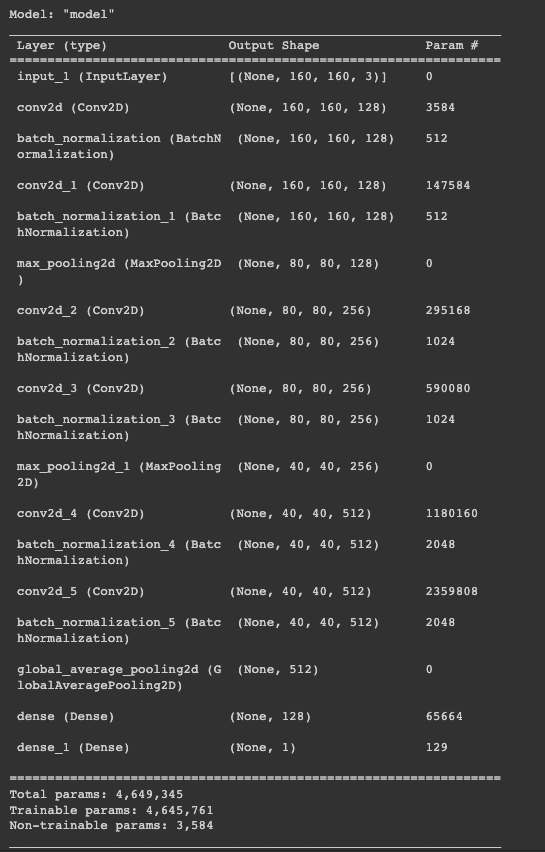

In [32]:
print(os.getcwd())

C:\PersonalStuff\IABD\ProgramacionInteligenciaArtificial\Ana\Unit04-KnowledgeTransfer


In [26]:
# Carpeta en la que guardar los modelos
path_models = os.path.join(os.getcwd(), 'models')
if not os.path.exists(path_models):
    os.mkdir(path_models)

In [30]:
def plot_losses(history):
    last_epoch_loss = history.history['loss'][-1]
    last_epoch_val_loss = history.history['val_loss'][-1]

    figure = plt.figure(figsize=(10, 8))

    axes = figure.add_subplot(1, 1, 1)

    axes.plot(history.history['loss'], color="#003B80", linestyle="dotted",
              label=f"loss entrenamiento {last_epoch_loss:.2f}")
    axes.plot(history.history['val_loss'], color="#003B80", label=f"loss validación {last_epoch_val_loss:.2f}")

    axes.set_xlabel('Época', color="#003B80", fontsize=14)
    axes.set_ylabel('Pérdidas', color="#003B80", fontsize=14)

    axes.set_title('Pérdidas durante el entrenamiento', fontsize=18)
    axes.set_facecolor('#F0F7FF')
    axes.legend(loc="best")
    axes.grid(visible=True, which='major', axis='both', color="#FFFFFF", linewidth=2)
    axes.set_axisbelow(True)
    axes.set_ylim(ymin=0, ymax=1.1)
    axes.yaxis.set_major_locator(MultipleLocator(0.1))

    return figure

Epoch 1/15
63/63 [==============================] - ETA: 0s - loss: 0.6644 - accuracy: 0.5980
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to C:\PersonalStuff\IABD\ProgramacionInteligenciaArtificial\Ana\Unit04-KnowledgeTransfer\models/Train2\dogs_and_cats.h5
63/63 [==============================] - 27s 398ms/step - loss: 0.6644 - accuracy: 0.5980 - val_loss: 0.7362 - val_accuracy: 0.5000
Epoch 2/15


C:\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - ETA: 0s - loss: 0.6467 - accuracy: 0.6085
Epoch 2: val_accuracy did not improve from 0.50000
63/63 [==============================] - 24s 384ms/step - loss: 0.6467 - accuracy: 0.6085 - val_loss: 0.8758 - val_accuracy: 0.5000
Epoch 3/15
63/63 [==============================] - ETA: 0s - loss: 0.6279 - accuracy: 0.6430
Epoch 3: val_accuracy did not improve from 0.50000
63/63 [==============================] - 27s 430ms/step - loss: 0.6279 - accuracy: 0.6430 - val_loss: 1.0943 - val_accuracy: 0.5000
Epoch 4/15
63/63 [==============================] - ETA: 0s - loss: 0.6112 - accuracy: 0.6515
Epoch 4: val_accuracy did not improve from 0.50000
63/63 [==============================] - 29s 467ms/step - loss: 0.6112 - accuracy: 0.6515 - val_loss: 0.9559 - val_accuracy: 0.5000
Epoch 5/15
63/63 [==============================] - ETA: 0s - loss: 0.5989 - accuracy: 0.6740
Epoch 5: val_accuracy did not improve from 0.50000
63/63 [============================

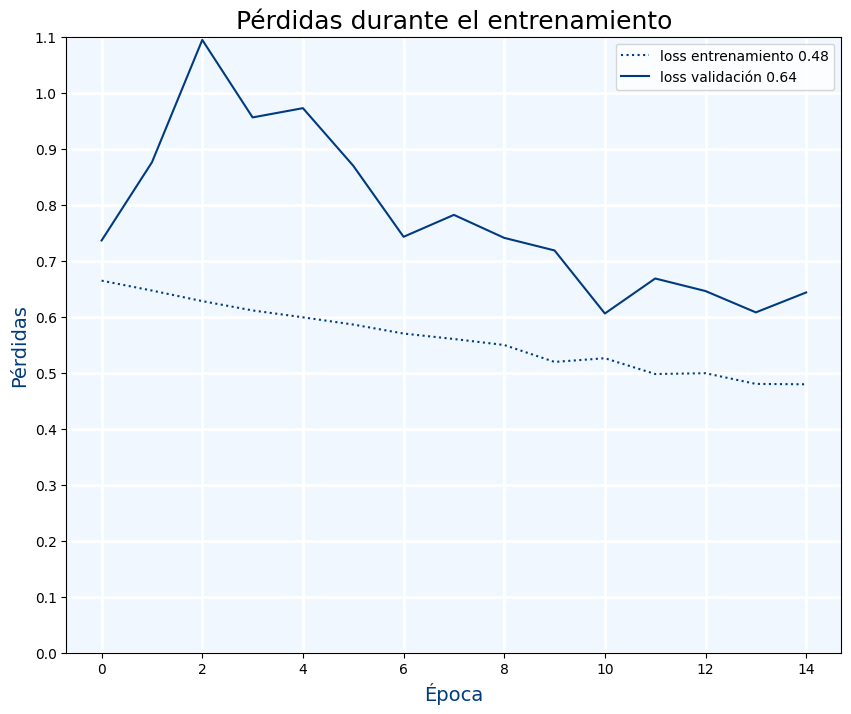

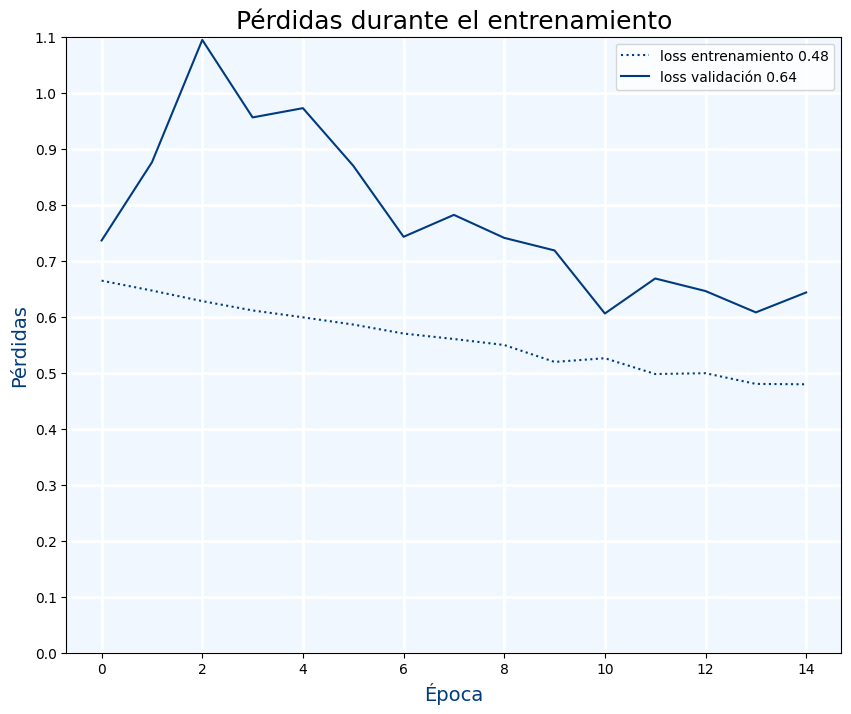

In [31]:
# 1. Normalización imágenes
def scaling_normalization(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label


train_dataset_norm = train_dataset.map(scaling_normalization)
validation_dataset_norm = validation_dataset.map(scaling_normalization)

# 2. Implementación arquitectura

input_layer = layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

layer_conv_1 = layers.Conv2D(filters=12, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
    input_layer)
batch_normalization_1 = layers.BatchNormalization()(layer_conv_1)

layer_conv_2 = layers.Conv2D(filters=12, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
    batch_normalization_1)
batch_normalization_2 = layers.BatchNormalization()(layer_conv_2)

max_pooling_1 = layers.MaxPool2D(pool_size=(2, 2))(batch_normalization_2)

layer_conv_3 = layers.Conv2D(filters=25, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
    max_pooling_1)
batch_normalization_3 = layers.BatchNormalization()(layer_conv_3)
layer_conv_4 = layers.Conv2D(filters=25, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
    batch_normalization_3)
batch_normalization_4 = layers.BatchNormalization()(layer_conv_4)
max_pooling_2 = layers.MaxPooling2D(pool_size=(2, 2))(batch_normalization_4)

layer_conv_5 = layers.Conv2D(filters=51, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
    max_pooling_2)
batch_normalization_5 = layers.BatchNormalization()(layer_conv_5)
layer_conv_6 = layers.Conv2D(filters=51, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
    batch_normalization_5)
batch_normalization_6 = layers.BatchNormalization()(layer_conv_6)
global_avg = layers.GlobalAveragePooling2D()(batch_normalization_6)

dense_1 = layers.Dense(12, activation="relu")(global_avg)
dense_2 = layers.Dense(1, activation="sigmoid")(dense_1)

model = Model(inputs=[input_layer], outputs=[dense_2])

# 3. Creación carpetas resultados experimentación: dogs_cats --> models --> Train2

# Carpeta en la que guardar los modelos
path_model_save = os.path.join(os.getcwd(), 'models/Train2')
if not os.path.exists(path_model_save):
    os.mkdir(path_model_save)

# 4. Compilación

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Entrenamiento

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(path_model_save, 'dogs_and_cats.h5'),
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=True
)

history = model.fit(train_dataset_norm,
                    epochs=15,
                    validation_data=validation_dataset_norm,
                    callbacks=[model_checkpoint_callback],
                    verbose=True)

# 6. Visualización curvas de aprendizaje

_ = plot_losses(history)

In [29]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 conv2d_36 (Conv2D)          (None, 160, 160, 128)     3584      
                                                                 
 batch_normalization_36 (Ba  (None, 160, 160, 128)     512       
 tchNormalization)                                               
                                                                 
 conv2d_37 (Conv2D)          (None, 160, 160, 128)     147584    
                                                                 
 batch_normalization_37 (Ba  (None, 160, 160, 128)     512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 80, 80, 128)       0   

# 2. Extracción de características

Ahora vamos a entrenar un modelo siguiendo una estrategia de transferencia de conocimiento empleando un modelo preentrenado como extractor de características, es decir, se van a congelar todas las capas a excepción de la capa final de clasificación que se sustituirá por un nuevo clasificador ajustado a nuestro problema.

Como arquitectura base vamos a emplear MobileNet V2 (desarrollado por Google). Este modelo está preentrenado en ImageNet.

Dentro de la API de keras podemos encontrar el modelo preentrenado. Con el argumento "include_top" a "False" le estamos indicando que no se incluya la capa correspondiente a la clasificación. Con el argumento "weights" le estamos indicando que inicialice la arquitectura con los pesos que se obtuvieron al entrenarla con ImageNet.

In [ ]:
# Tomamos MobileNetV2 como modelo base con los pesos de ImageNet

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

base_model.summary()

Esta arquitectura convierte una imagen de 160x160x3 en un bloque de características de 5x5x1280.

Para emplear el modelo anterior como extractor de características, tenemos que congelar todo el bloque convolucional, para ello, se establecen todas las capas pertenecientes al bloque convolucional (todas las que hemos cargado anteriormente en base_model) como no entrenables.

Esto se podría realizar capa a capa si únicamente se quisieran congelar algunas en concreto, pero dado que queremos congelar todo el bloque podemos hacerlo directamente como:

In [ ]:
base_model.trainable = False

El modelo MobileNetV2 se entrenó empleando un método de normalización basado en el reescalado de los valores de la imagen en -1 y 1. Podemos emplear el método incluido en la propia API de keras para preprocesar la imagen de la misma forma que se realizó originalmente. Lo siguente implementa una capa que se encarga de aplicar el preprocesado a la imagen, por lo tanto, se incluirá como una capa más de la arquitectura.

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

Finalmente, vamos a implementar la arquitectura.

A nuestro modelo base le vamos a añadir la capa final de clasificación.

Vamos a hacer uso de la capa "GlobalAveragePooling2D" para realizar promedios espaciales de las imágenes de 5x5 que se obtenían a la salida del modelo base y convertirlo en un vector de características de 1280 elementos por imagen.

In [ ]:
# Implementamos arquitectura

input = layers.Input(shape=(160, 160, 3))
# Capa preprocesado
x = preprocess_input(input)
# Añadimos modelo base
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
# Clasificación binaria
output = layers.Dense(1, activation="sigmoid")(x)

model_tl = Model(inputs=[input], outputs=[output])

model_tl.summary()

Si echamos un vistazo al número de parámetros total y el entrenable, podemos ver como, correspondientes a la capa de "mobilenetv2" (modelo preentrenado) no se va a entrenar ningún parámetro. Todos los que se van a entrenar provienen de la capa totalmente conectada de clasificación.

A continuación vamos a realizar el entrenamiento. Vamos a crear una nueva carpeta de experimentación "Train3".

In [ ]:
path_experiment = os.path.join(path_models, 'Train3')
if not os.path.exists(path_experiment):
    os.mkdir(path_experiment)

In [ ]:
# Compilamos
model_tl.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Inicializamos el callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(path_experiment, 'dogs_and_cats.h5'),
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# Entrenamos
history_tl = model_tl.fit(train_dataset,
                          epochs=10,
                          validation_data=validation_dataset,
                          callbacks=[model_checkpoint_callback],
                          verbose=1)

In [ ]:
# Visualizamos curvas de aprendizaje
plt.figure(figsize=(10, 8))
plt.plot(history_tl.history['accuracy'], label='Entrenamiento')
plt.plot(history_tl.history['val_accuracy'], label='Validación')
plt.title('Exactitud entrenamiento vs. validación')
plt.legend()

In [ ]:
# Comparamos curvas de aprendizaje validación
plt.figure(figsize=(10, 8))
plt.plot(history.history['val_accuracy'], label='Sin trans. conocimiento')
plt.plot(history_tl.history['val_accuracy'], label='Con trans. conocimiento')
plt.title('Exactitud sin vs. con transferencia conocimiento (validación)')
plt.legend()

Podemos observar la gran diferencia en el rendimiento del modelo. Realizando un poco más de experimentación sobre el modelo inicial seguramente hubiéramos llegado a conseguir mejores resultados, sin embargo, hubiera sido dificil alcanzar el mismo rendimiento que el que hemos obtenido con la transferencia de conocimiento.

También es cierto que la BBDD que hemos empleado tiene dos clases que ya están incluidas en la BBDD de imagenet, por lo tanto, se espera que el modelo se adapte facilmente a este problema. Generalmente, vamos a emplear BBDD con clases totalmente diferentes a las incluidas en ImageNet, en estos casos, también es recomendable evaluar la tranferencia de conocimiento. En la mayoría de las ocasiones da mejores resultados que implementar una arquitectura de cero con pesos inicializados de manera aleatoria.

# 3. Ajuste fino

Como ya se ha comentado, en el experimento anterior no se han entrenado/ajustado las capas pertenecientes al modelo preentrenado. Una forma de aumentar todavía más el rendimiento del modelo es realizar un ajuste (fino) de los pesos de estas capas. De este modo, ajustaremos los filtros de las capas convolucionales a extraer mapas de características apropiados para la resolución del nuevo problema. Este paso se recomienda incluirlo cuando el conjunto de datos de entrenamiento es grande y muy similar al conjunto de datos original en el que se entrenó el modelo preentrenado.

NOTA IMPORTANTE: Este ajuste fino debe de realizarse tras al ajuste de la capa de clasificación con las capas preentrenadas congeladas. Si se agrega el clasificador inicializado aleatoriamente y no se congelan las capas preentrenadas (se ajustan todos los pesos de la red), la magnitud de las actualizaciones de gradiente será demasiado grande (debido a los pesos aleatorios del clasificador) y el modelo entrenado previamente olvidará lo que ya ha aprendido.

No se va a realizar el ajuste de todas las capas preentrenadas, únicamente aquellas de más alto nivel que son las que están más especializadas en el problema para el que fueron entrenadas. Las primeras capas aprenden características más simples y genéricas que generalizan a casi todos los tipos de imágenes. De este modo, vamos a descongelar únicamente las capas superiores.

In [ ]:
# Vemos el número de capas que tiene el modelo base
print("Número de capas en el modelo base: ", len(base_model.layers))

Vamos a ajustar las capas desde la capa 100

In [ ]:
# Volvemos a descongelar el modelo
base_model.trainable = True

# Como ahora solo queremos entrenar capas específicas, vamos a congelar las capas concretas que no queremos reentrenar (hasta la 100)
for layer in base_model.layers[:100]:
    layer.trainable = False

**NOTA IMPORTANTE:** Como solo queremos readaptar unos pesos ya entrenados, se va a emplear una **tasa de aprendizaje pequeña** para evitar el sobreajuste.

In [ ]:
model_tl.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

model_tl.summary()

Vemos como ahora hay más parámetros a entrenar. Estos parámetros adicionales son los que provienen del modelo preentrenado (mobilenetv2).

Entrenamos durante 5 épocas más

In [ ]:
history_fine = model_tl.fit(train_dataset,
                            epochs=5,
                            validation_data=validation_dataset,
                            callbacks=[model_checkpoint_callback],
                            verbose=1)

# Empleamos mismo callback!

In [ ]:
# Analizamos conjuntamente la precisión en entrenamiento y validación al congelar todas las capas y tras descongelar algunas de ellas

acc = history_tl.history['accuracy'] + history_fine.history['accuracy']
val_acc = history_tl.history['val_accuracy'] + history_fine.history['val_accuracy']

plt.figure(figsize=(10, 8))
plt.plot(acc, label='Entrenamiento')
plt.plot(val_acc, label='Validación')
plt.ylim([0.9, 1])
plt.plot([10, 10],
         plt.ylim(), label='Inicio ajuste fine')
plt.legend()
plt.title('Exactitud entrenamiento vs. validación')